# Laboratorio 2

## 1. Carga de datos

In [2]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [24]:
df = pd.read_csv('./data/MotorAlpes_data.csv', index_col=False)
df = df.iloc[:, 1:]

## 2. Descripción de los datos

In [26]:
df.shape

(7115, 11)

In [27]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6876 non-null   float64
 1   km_driven      6917 non-null   float64
 2   owner          6876 non-null   object 
 3   seller_type    7115 non-null   object 
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   object 
 6   transmission   7115 non-null   object 
 7   mileage        6917 non-null   float64
 8   engine         6835 non-null   float64
 9   max_power      6847 non-null   float64
 10  selling_price  6714 non-null   float64
dtypes: float64(7), object(4)
memory usage: 611.6+ KB


,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
0,NaN,145500.0,NaN,Individual,5.0,Diesel,Manual,23.40,1248.0,74.00,5451.90
1,2014.0,120000.0,Second Owner,Individual,5.0,Diesel,Manual,21.14,1498.0,103.52,4482.68
2,2006.0,140000.0,Third Owner,Individual,5.0,Petrol,Manual,17.70,13524.0,78.00,1914.22
3,2010.0,127000.0,First Owner,Individual,5.0,Diesel,Manual,23.00,NaN,NaN,2725.95
4,2007.0,120000.0,First Owner,Individual,5.0,Petrol,Manual,16.10,1298.0,88.20,1574.99
...,...,...,...,...,...,...,...,...,...,...,...
7110,2013.0,110000.0,First Owner,Individual,5.0,Petrol,Manual,18.50,NaN,1525.41,3876.91
7111,2007.0,119000.0,Fourth & Above Owner,Individual,5.0,Diesel,Manual,16.80,1493.0,110.00,1635.57
7112,2009.0,120000.0,First Owner,Individual,5.0,Diesel,Manual,19.30,1248.0,73.90,4628.06
7113,2013.0,25000.0,First Owner,Individual,5.0,Diesel,Manual,23.57,1396.0,70.00,3513.45


In [28]:
df.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


### 2.1 Completitud

In [29]:
df.isnull().sum()    

year             239
km_driven        198
owner            239
seller_type        0
seats              0
fuel               0
transmission       0
mileage          198
engine           280
max_power        268
selling_price    401
dtype: int64

In [30]:
df.isnull().sum() / df.shape[0]

year             0.033591
km_driven        0.027829
owner            0.033591
seller_type      0.000000
seats            0.000000
fuel             0.000000
transmission     0.000000
mileage          0.027829
engine           0.039353
max_power        0.037667
selling_price    0.056360
dtype: float64

### 2.2 Consistencia

In [7]:
# check if year is between 1994 and 2020

print(all(map(lambda x: x in range(1994,2021), df["year"])))

False


In [8]:
# check if km_driven is between 1 and 2’360.457

print(all(map(lambda x: x in range(1,2360458), df["km_driven"])))

False


In [9]:
# check if owner is in ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']

print(all(map(lambda x: x in ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], df["owner"])))

False


In [10]:
# check if seller_type is in ['Individual', 'Dealer', 'Trustmark Dealer']

print(all(map(lambda x: x in ['Individual', 'Dealer', 'Trustmark Dealer'], df["seller_type"])))

True


In [11]:
# check if seats is between 2 and 14

print(all(map(lambda x: x in range(2,15), df["seats"])))

False


In [12]:
# check if fuel is in ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric']

print(all(map(lambda x: x in ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], df["fuel"])))

True


In [13]:
# check if transmission is in ['Manual', 'Automatic']

print(all(map(lambda x: x in ['Manual', 'Automatic'], df["transmission"])))

True


In [10]:
# check if mileage is between 0 and 46.816

print(all(map(lambda x: 34.2 <= x <= 46.816, df["mileage"])))

False
False


In [15]:
# check if engine is between 624 and 3604

print(all(map(lambda x: x in range(624,3605), df["engine"])))

False


In [11]:
# check if max_power is between 34.2 and 400

print(all(map(lambda x: 32.8 <= x <= 400, df["max_power"])))

False
False


In [14]:
# check if selling_price is between 363.45 and 121153.38

print(all(map(lambda x: 363.45 <= x <= 121153.38, df["selling_price"])))

False


### 2.3 Consistencia

In [24]:
# for every categorical variable, check if there are values that are not in the list of possible values

categorical = ['owner', 'seller_type', 'fuel', 'transmission']

for col in categorical:
    print(col, df[col].unique())

owner [nan 'Second Owner' 'Third Owner' 'First Owner' 'Fourth & Above Owner'
 'Test Drive Car']
seller_type ['Individual' 'Dealer' 'Trustmark Dealer']
fuel ['Diesel' 'Petrol' 'LPG' 'CNG']
transmission ['Manual' 'Automatic']


## 3. Análisis Exploratorio

### 3.1 Preparación de los datos

In [27]:
# Fill numerical values with the median so as not to skew the data
df = df.fillna(df.median())

# Fill categorical values with the mode
categorical_cols = ['owner', 'seller_type', 'fuel', 'transmission']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    
# Drop all null values
df = df.dropna()

# Replace the "year" column values so as to
df['year'] = df['year'].astype(int)

### 3.2 Visualización de los datos

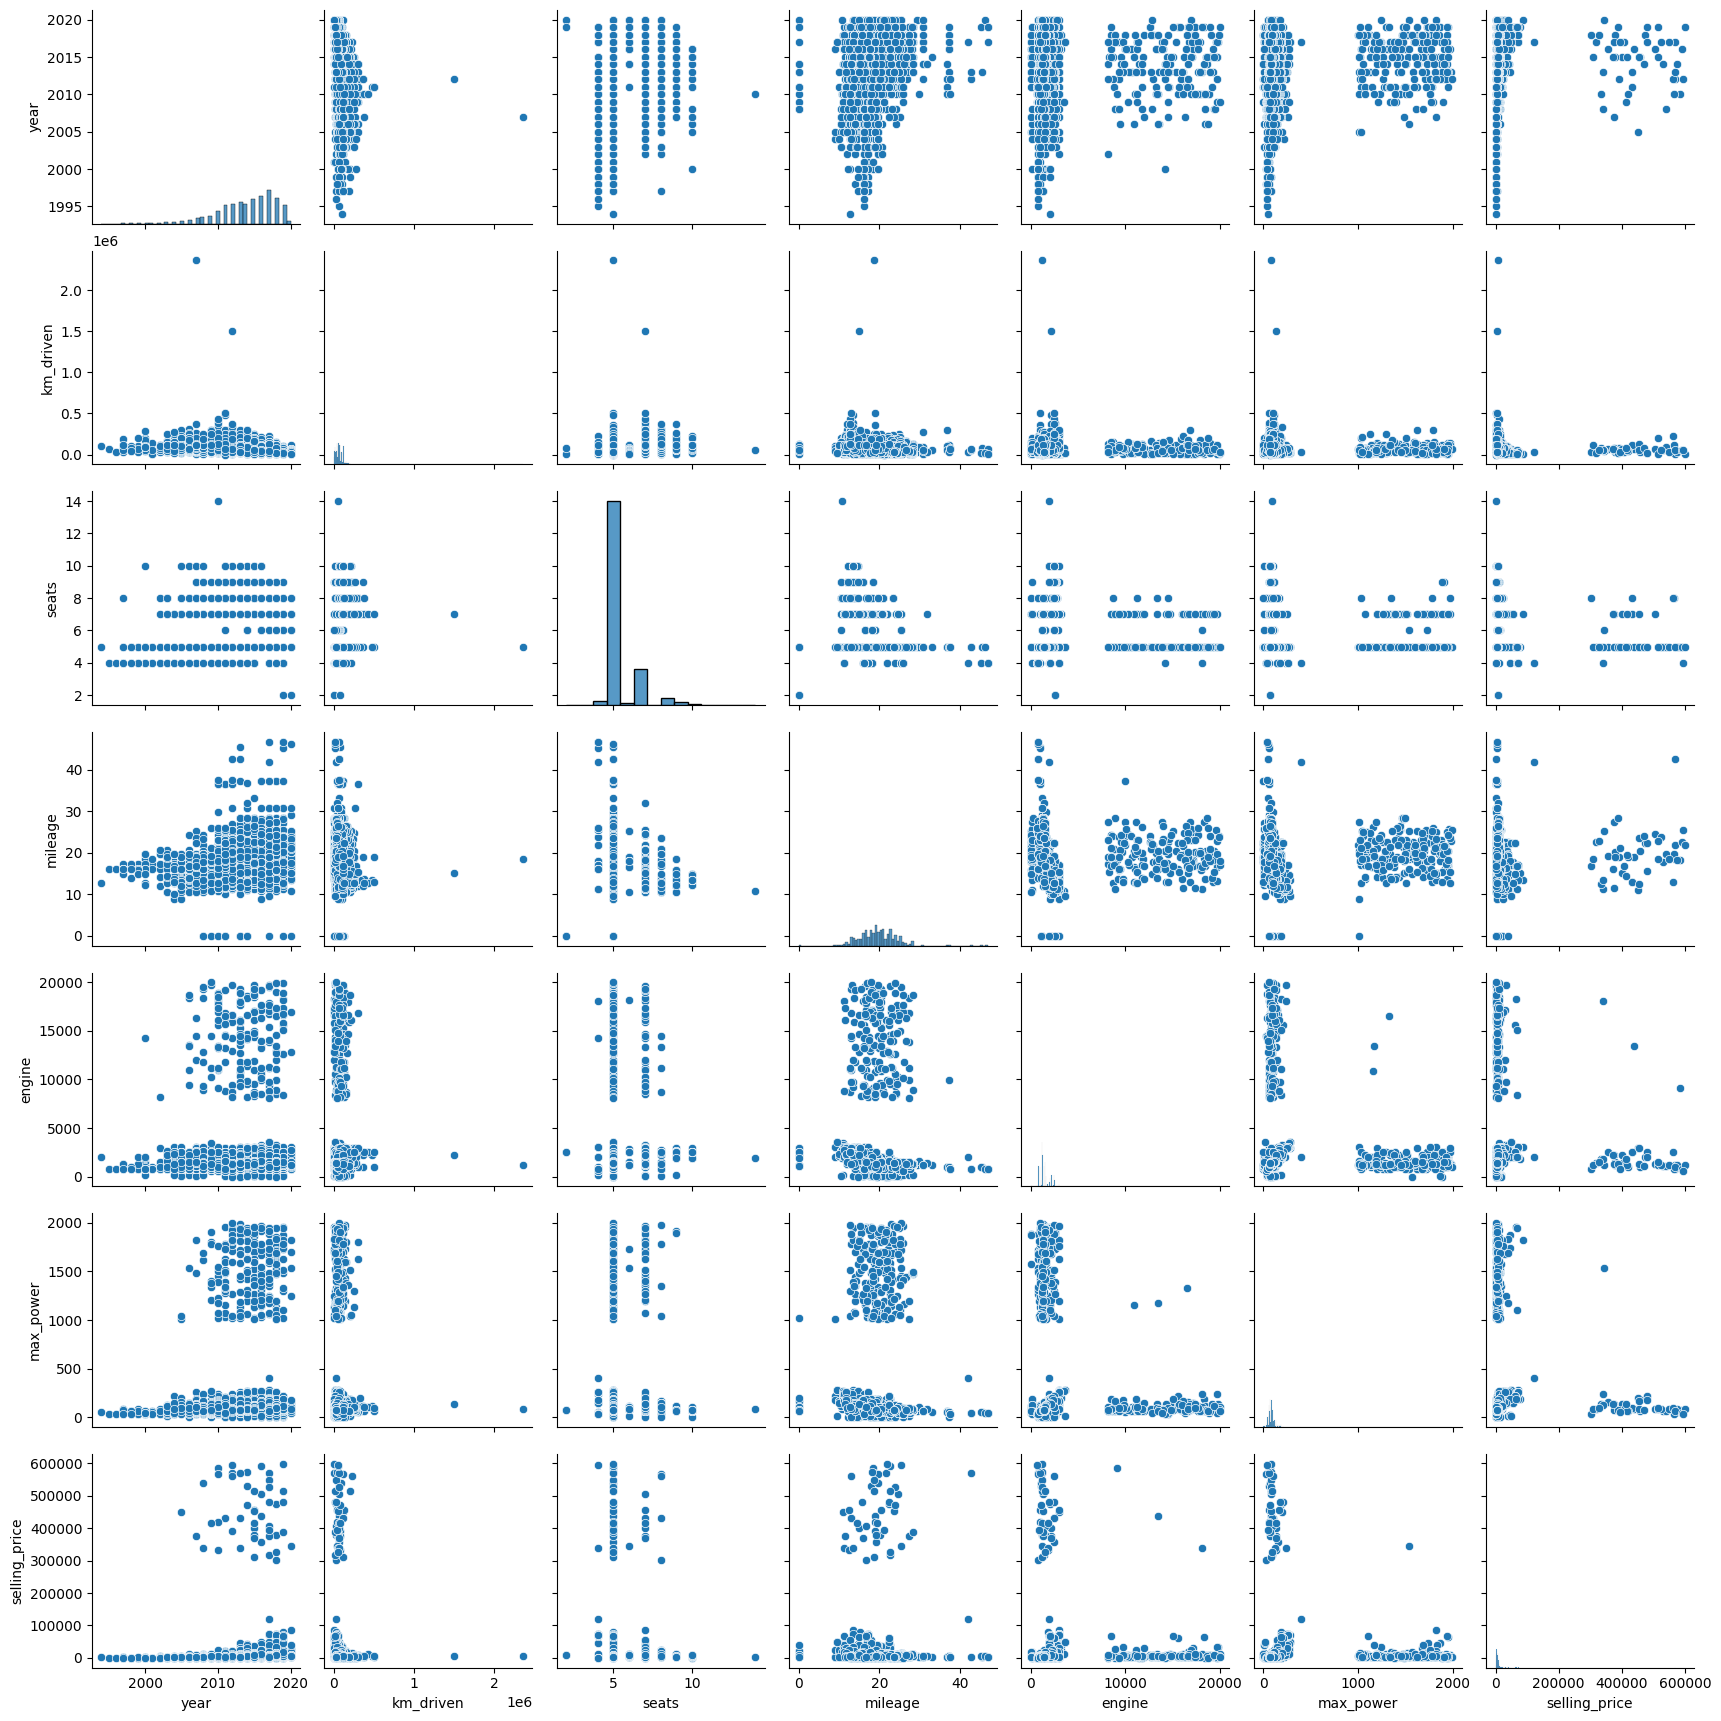

In [29]:
sns.pairplot(df)
plt.show()